## Building the model

In [119]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.ticker as ticker

In [10]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv',
           error_bad_lines=False)
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
                   error_bad_lines=False)
#cases['FIPS'] = cases['FIPS'].astype('int')
day_cases = get_day_cases()
counties = pd.read_csv('https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv',
                      error_bad_lines=False)
county_cases = pd.read_csv('https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_level/processed/nytimes_infections/nytimes_infections.csv',
                          error_bad_lines=False)

death_keep = [col+'_deaths' if (col in cases.columns and col != 'FIPS') else col for col in deaths.columns]
cases_keep = [col+'_cases' for col in cases.columns[12:]]
cases_and_deaths = cases.merge(deaths, on='FIPS', suffixes=('_cases', '_deaths'))[death_keep+cases_keep]
renamer = lambda name: name if (type(name) != str or '/' in name or '_deaths' not in name) else name[:-7]
cases_and_deaths = cases_and_deaths.rename(columns=renamer)
cases_and_deaths.head()

valid_territories = cases_and_deaths[(cases_and_deaths['Lat'] > 0) & ~np.isnan(cases_and_deaths['FIPS'])]
valid_territories.loc[:, 'FIPS'] = valid_territories['FIPS'].astype('int')
valid_counties = counties[~counties['countyFIPS'].isin(['City1', 'City2'])]
valid_counties.loc[:, 'countyFIPS'] = valid_counties['countyFIPS'].astype('int')

county_all = valid_counties.merge(valid_territories, left_on='countyFIPS', right_on='FIPS')
county_all = county_all.drop(columns=['Lat', 'Long_', 'Province_State', 'Country_Region', 'FIPS'])

In [15]:
day_cases[0]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427,4.0,48.662422,42109.0,NaN,3.246753,84000004,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176
5,Colorado,US,2020-04-12 23:18:15,39.0598,-105.3111,7307,289,NaN,7018,8.0,128.943729,34873.0,1376.0,3.955112,84000008,USA,615.389991,18.831258
6,Connecticut,US,2020-04-12 23:18:15,41.5978,-72.7554,12035,554,NaN,11481,9.0,337.560483,41220.0,1654.0,4.603241,84000009,USA,1156.148159,13.743249
7,Delaware,US,2020-04-12 23:18:15,39.3185,-75.5071,1625,35,191.0,1590,10.0,166.878217,11103.0,190.0,2.153846,84000010,USA,1140.214672,11.692308
8,Florida,US,2020-04-12 23:18:15,27.7663,-81.6868,19895,461,NaN,19434,12.0,93.700227,182753.0,2772.0,2.317165,84000012,USA,860.718651,13.933149
9,Georgia,US,2020-04-12 23:18:15,33.0406,-83.6431,12452,433,NaN,12019,13.0,122.808141,54453.0,2505.0,3.477353,84000013,USA,537.043983,20.117250


In [11]:
get_trait_ts = lambda terr, trait: [day_cases[day][trait][terr] for day in range(len(day_cases))]

In [13]:
mort_rates = np.zeros((50, len(day_cases)))
for terr in range(50):
    mort_rates[terr, :] = get_trait_ts(terr, 'Mortality_Rate')
start, end = datetime.datetime(2020, 4, 12), datetime.datetime(2020, 5, 12)
mort_matrix = pd.DataFrame(mort_rates, index=day_cases[0]['Province_State'], columns = pd.date_range(start, end))


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn import metrics


def cross_validate_acc(model, X, y):
    model = clone(model, safe=False)
    five_fold = KFold(n_splits=5)
    acc_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y[tr_ind])
        acc_values.append(model.score(X.iloc[va_ind,:], y[va_ind]))
    return np.mean(acc_values)

def cross_validate_rmse(model, X, y):
    model = clone(model, safe=False)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

Training Error: 0.020658407407562
Cross Validation Error 0.03369581902636094


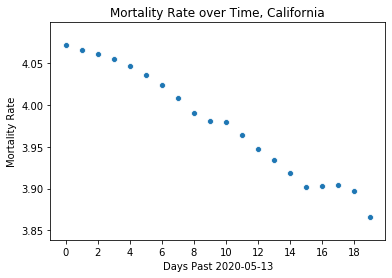

In [130]:
def get_single_state(state='California'):
    features_of_interest = ['Confirmed', 'Deaths', 'Active', 'Incident_Rate', 'Mortality_Rate']
    state_df = pd.DataFrame({'day': np.zeros(5)})
    for df in day_cases:
        row = df.loc[df['Province_State'] == state]
        date = pd.to_datetime(row['Last_Update'].values[0])
        state_df[date] = np.array(row[features_of_interest].values[0])
    state_df = state_df.drop('day', axis =1)
    state_df.index = features_of_interest
    return state_df.T

def get_country():
    nation_df = pd.DataFrame()
    for state in day_cases[0]['Province_State']:
        df = get_single_state(state)
        nation_df = nation_df.append(df)
    return nation_df

def create_model(state='California', nation=False, future=13, past=13):
    model = LinearRegression()
    matrix = get_single_state(state)
    X_train = matrix.iloc[-2*past:-1*past, :]
    y_train = matrix['Mortality_Rate'][-1*past:]
    model.fit(X_train, y_train)
    y_hat = model.predict(X_train)
    print('Training Error:', rmse(y_train, y_hat))
    print('Cross Validation Error', cross_validate_rmse(model, X_train, y_train))
    return model


model13 = create_model()
def plot_predictions(model, matrix, state='State Name Here', forecast=20):
    guess = model.predict(matrix.iloc[-1 * forecast:,:])
    x = range(forecast)
    
    ax = sns.scatterplot(x =x, y=guess)
    ax.set(xlabel='Days Past '+str(date.today()), ylabel='Mortality Rate')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set(title='Mortality Rate over Time, ' + state)
    plt.show()

plot_predictions(model13, get_single_state('California'), state='California')